## Assignment 1: Exploratory Data Analysis (EDA) on the World Glacier Inventory Dataset

#### Description of the World Glacier Inventory (WGI)

The World Glacier Inventory (WGI) offers extensive data on over 130,000 glaciers across various continents, capturing a global perspective on glacier distribution. Each glacier entry is classified by its Continent, allowing for a geographic breakdown of glacial locations. This classification provides insights into how glaciers are distributed across the world, helping to identify patterns related to climate, altitude, and regional conditions. The dataset, which primarily draws from aerial photographs and topographic maps, also includes columns like Topographic Map Year, Topographic Map Scale, and Photograph Year, which further detail when and how the glacier data was captured. Through this comprehensive and continent-specific approach, the WGI serves as a valuable resource for understanding glacial trends and their environmental significance globally..

The objective was to analyze the World Glacier Inventory dataset to understand the characteristics of glaciers worldwide, identify trends, and draw insights that could inform discussions on climate change and environmental impact.

"""

The dataset used in this assigment found at "kaggle.com"

"""

Downloaded from this link: https://www.kaggle.com/datasets/nsidcorg/glacier-inventory

In [66]:
import geopandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import altair as alt

In [31]:
#Loaded the Data
import pandas as pd
df = pd.read_csv(r"D:\Govener State\Business Analytics_2024FA\Assignment 1 Exploratory Data Analysis\World Glacier Inventory\WGI.csv")

pd.set_option('display.max_columns', None)
df.head (15)


C:\Users\Ammar\AppData\Local\Temp\ipykernel_11176\3205207849.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"D:\Govener State\Business Analytics_2024FA\Assignment 1 Exploratory Data Analysis\World Glacier Inventory\WGI.csv")  # Load your dataset


,Glacier ID,Political Unit,Continent,Basin Code,Location Code,Glacier Code,Glacier Name,Latitude,Longitude,Primary Class,Glacier Source,Basin Count,Glacier Form,Glacier Activity,Activity Start,Activity End,Minimum Elevation,Minimum Elevation Exposed,Mean Elevation,Mean Elevation Accumulation,Mean Elevation Ablation,Maximum Elevation,Snow Line Elevation,Snow Line Accuracy,Glacier Area,Area Accuracy,Area Exposed,Mean Width,Mean Length,Maximum Length,Maximum Length Exposed,Maximum Length Ablation,Mean Depth,Depth Accuracy,Accumulation Orientation,Ablation Orientation,Topographic Map Year,Topographic Map Scale,Photograph Year
0,AF5Q112B0001,AFGHANISTAN,ASIA,Q112,B0,1,NaN,34.672,68.874,9,0.0,NaN,3.0,0.0,NaN,NaN,3975.0,NaN,4110.0,NaN,NaN,4250.0,NaN,NaN,1.28,3.0,NaN,NaN,NaN,1.9,NaN,NaN,NaN,NaN,NE,NE,1959.0,100000.0,NaN
1,AF5Q112B0002,AFGHANISTAN,ASIA,Q112,B0,2,NaN,34.676,68.855,9,0.0,NaN,3.0,0.0,NaN,NaN,4250.0,NaN,4350.0,NaN,NaN,4450.0,NaN,NaN,0.31,3.0,NaN,NaN,NaN,0.8,NaN,NaN,NaN,NaN,NW,NW,1959.0,100000.0,NaN
2,AF5Q112B0003,AFGHANISTAN,ASIA,Q112,B0,3,NaN,34.689,68.854,9,0.0,NaN,3.0,0.0,NaN,NaN,4000.0,NaN,4100.0,NaN,NaN,4200.0,NaN,NaN,0.60,3.0,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NW,NW,1959.0,100000.0,NaN
3,AF5Q112B0004,AFGHANISTAN,ASIA,Q112,B0,4,NaN,34.707,68.857,9,0.0,NaN,3.0,0.0,NaN,NaN,4000.0,NaN,4175.0,NaN,NaN,4350.0,NaN,NaN,0.56,3.0,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NE,NE,1959.0,100000.0,NaN
4,AF5Q112B0005,AFGHANISTAN,ASIA,Q112,B0,5,NaN,34.719,68.852,9,0.0,NaN,2.0,0.0,NaN,NaN,3750.0,NaN,4050.0,NaN,NaN,4350.0,NaN,NaN,1.06,3.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1959.0,100000.0,NaN
5,AF5Q112B0006,AFGHANISTAN,ASIA,Q112,B0,6,NaN,34.806,68.868,9,0.0,NaN,3.0,0.0,NaN,NaN,3550.0,NaN,3900.0,NaN,NaN,4250.0,NaN,NaN,0.75,3.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NW,NW,1959.0,100000.0,NaN
6,AF5Q112B0007,AFGHANISTAN,ASIA,Q112,B0,7,NaN,34.818,68.872,9,0.0,NaN,3.0,0.0,NaN,NaN,3700.0,NaN,3925.0,NaN,NaN,4150.0,NaN,NaN,0.84,3.0,NaN,NaN,NaN,1.7,NaN,NaN,NaN,NaN,N,N,1959.0,100000.0,NaN
7,AF5Q112B0008,AFGHANISTAN,ASIA,Q112,B0,8,NaN,34.802,68.886,9,0.0,NaN,2.0,0.0,NaN,NaN,3850.0,NaN,4225.0,NaN,NaN,4600.0,NaN,NaN,2.03,3.0,NaN,NaN,NaN,3.3,NaN,NaN,NaN,NaN,NaN,NaN,1959.0,100000.0,NaN
8,AF5Q112B0009,AFGHANISTAN,ASIA,Q112,B0,9,NaN,34.807,68.891,9,0.0,NaN,3.0,0.0,NaN,NaN,3800.0,NaN,3925.0,NaN,NaN,4050.0,NaN,NaN,0.53,3.0,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN,N,NW,1959.0,100000.0,NaN
9,AF5Q112B0010,AFGHANISTAN,ASIA,Q112,B0,10,NaN,35.175,68.757,9,0.0,NaN,2.0,0.0,NaN,NaN,3825.0,NaN,4040.0,NaN,NaN,4250.0,NaN,NaN,0.88,3.0,NaN,NaN,NaN,2.2,NaN,NaN,NaN,NaN,NE,E,1959.0,100000.0,NaN


In [47]:
#Assessed Data Quality
df.isnull().sum()

Glacier ID                          0
Political Unit                      0
Continent                           0
Basin Code                          0
Location Code                       0
Glacier Code                        0
Glacier Name                    80692
Latitude                            0
Longitude                           0
Primary Class                       0
Glacier Source                     57
Basin Count                     86558
Glacier Form                     1013
Glacier Activity                   49
Activity Start                  96322
Activity End                   100381
Minimum Elevation               12200
Minimum Elevation Exposed       36571
Mean Elevation                  42641
Mean Elevation Accumulation     85801
Mean Elevation Ablation         90289
Maximum Elevation               13653
Snow Line Elevation             80263
Snow Line Accuracy              83501
Glacier Area                     2939
Area Accuracy                   33088
Area Exposed

In [38]:
# Basic Information about the Data
df.info ()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100518 entries, 0 to 100517
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Glacier ID                   100518 non-null  object 
 1   Political Unit               100518 non-null  object 
 2   Continent                    100518 non-null  object 
 3   Basin Code                   100518 non-null  object 
 4   Location Code                100518 non-null  object 
 5   Glacier Code                 100518 non-null  object 
 6   Glacier Name                 19826 non-null   object 
 7   Latitude                     100518 non-null  float64
 8   Longitude                    100518 non-null  float64
 9   Primary Class                100518 non-null  int64  
 10  Glacier Source               100461 non-null  float64
 11  Basin Count                  13960 non-null   float64
 12  Glacier Form                 99505 non-null   float64
 13 

(100518, 39)

In [50]:
# Viewing The Unique Values
df.nunique()

Glacier ID                     100327
Political Unit                     36
Continent                           6
Basin Code                        613
Location Code                     424
Glacier Code                     2604
Glacier Name                     9939
Latitude                        26792
Longitude                       42105
Primary Class                      10
Glacier Source                      4
Basin Count                         5
Glacier Form                       10
Glacier Activity                    9
Activity Start                     52
Activity End                       14
Minimum Elevation                3063
Minimum Elevation Exposed        2435
Mean Elevation                   3755
Mean Elevation Accumulation      1736
Mean Elevation Ablation          1663
Maximum Elevation                4040
Snow Line Elevation              1767
Snow Line Accuracy                  5
Glacier Area                     5472
Area Accuracy                       6
Area Exposed

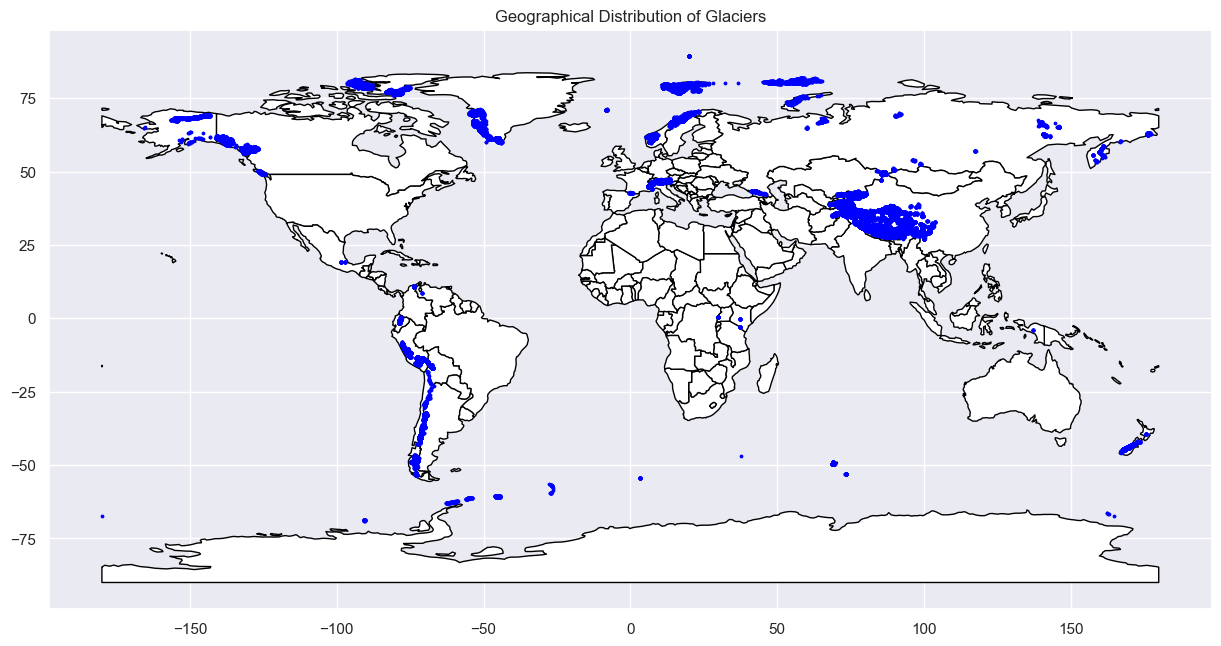

In [253]:
#Geographical Distribution of Glaciers

ax = world.plot(figsize=(15, 10), color='white', edgecolor='black')
gdf.plot(ax=ax, color='blue', markersize=3)
plt.title('Geographical Distribution of Glaciers')
plt.show()


## Geographical Distribution of Glaciers

The map shows that glaciers are mainly found in colder regions of the world, especially near the North and South Poles. In the northern hemisphere, large clusters of glaciers are located in Greenland, parts of North America, Scandinavia, and Russia. In the southern hemisphere, glaciers are mostly found in the Andes mountains of South America and Antarctica.

The distribution of glaciers follows clear patterns. They are commonly found in areas with high elevations and colder climates, such as mountains and polar regions. There are very few glaciers near the equator, and those that do exist are scattered in mountainous areas. Overall, the map highlights how glaciers are closely tied to cold environments and high altitudes, with little to no presence in warmer, tropical regions.

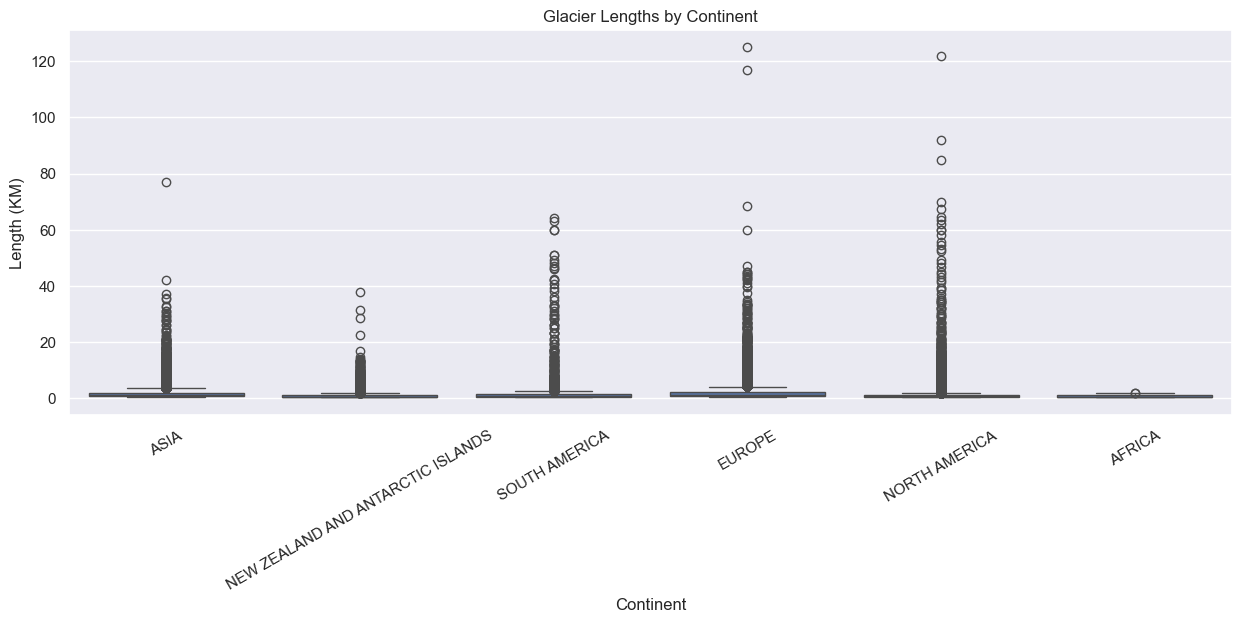

In [255]:
# Exploring glacier lengths grouped by continent Through a box plot

sns.set(style="darkgrid")
plt.figure(figsize=(15, 5))
sns.boxplot(x='Continent', y='Maximum Length', data=df) 
plt.title('Glacier Lengths by Continent')
plt.xlabel('Continent')
plt.ylabel('Length (KM)')
plt.xticks(rotation=30)
plt.show()

## Asia and North America have the longest glaciers:
These continents exhibit the widest range of glacier lengths, with notable outliers extending beyond 80 km. This suggests that these regions likely contain larger glacier systems compared to other continents.



## New Zealand and Antarctic Islands: 
This region shows a relatively wide range of glacier lengths compared to Africa and Europe but lacks the extreme outliers seen in Asia or North America. The glaciers here are more consistently distributed around the median.

## Europe and South America:
These continents have similar ranges of glacier lengths, with most glaciers being relatively short. The spread is narrow, indicating fewer glaciers that are significantly longer than others, with very few outliers.

## Africa: 
Glaciers in Africa are extremely small in comparison, with very little variability and no notable outliers. This suggests minimal glaciation activity on the continent.

## Outliers: 
Both Asia and North America show significant outliers, indicating the presence of exceptionally long glaciers in these areas, far exceeding the median glacier lengths.

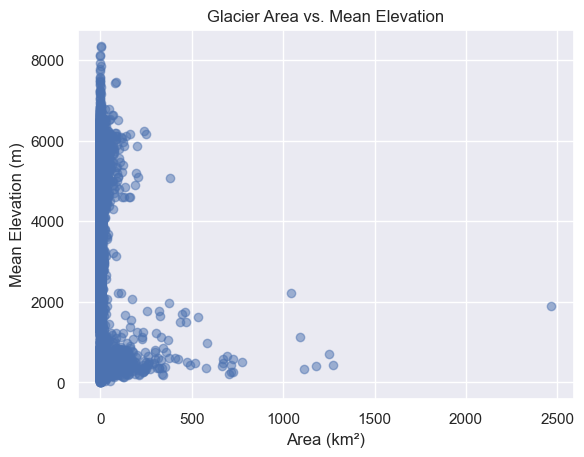

In [258]:
#Explaoring Glacier Area Vs Mean Elevation
plt.scatter(df['Glacier Area'], df['Mean Elevation'], alpha=0.5)
plt.title('Glacier Area vs. Mean Elevation')
plt.xlabel('Area (km²)')
plt.ylabel('Mean Elevation (m)')
plt.show()

The scatter plot revealed the complex relationship between glacier area and elevation. Larger glaciers were generally at higher elevations, while smaller ones appeared at lower levels, suggesting the influence of various environmental factors. Outliers highlighted the complexity of glacier dynamics, providing researchers with insights into unique conditions and their impact on glacier behavior.

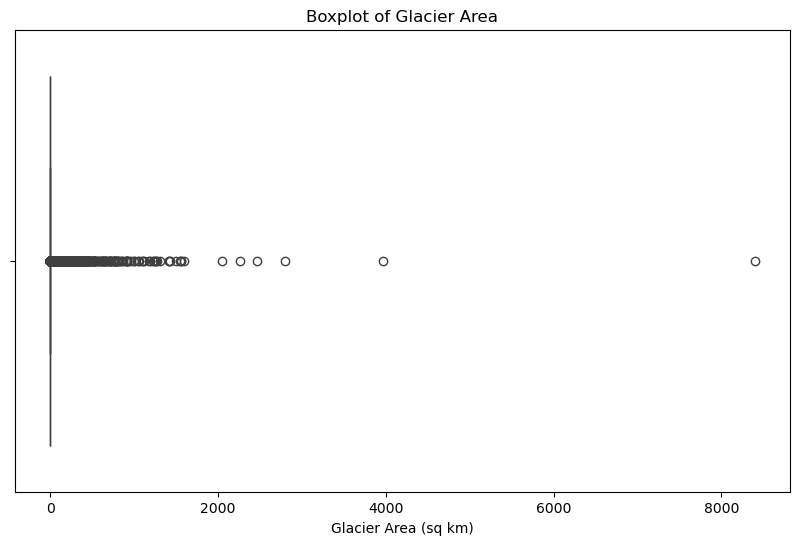

In [54]:
#Identifing Outliers
##This visualization facilitated a discussion on the implications of outliers for our analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Glacier Area'])
plt.title('Boxplot of Glacier Area')
plt.xlabel('Glacier Area (sq km)')
plt.show()

## Boxplot of Glacier Area

### Insights:
- The majority of glaciers have relatively small areas, clustering close to the lower end of the scale. Most glaciers occupy less than 2,000 square kilometers.
- The presence of several outliers indicates some glaciers with exceptionally large areas, as evidenced by the points extending far to the right of the boxplot, with one glacier having an area over 8,000 square kilometers.
  
### Patterns:
- The distribution is heavily skewed, with most glaciers having small surface areas and a few having much larger areas.
- Outliers represent extreme values that deviate significantly from the majority of glaciers, potentially requiring separate analysis to understand their impact on overall results.
  
### Implications for Analysis:
- The existence of these outliers suggests that additional statistical techniques may be needed to handle extreme glacier sizes to avoid skewing the results.

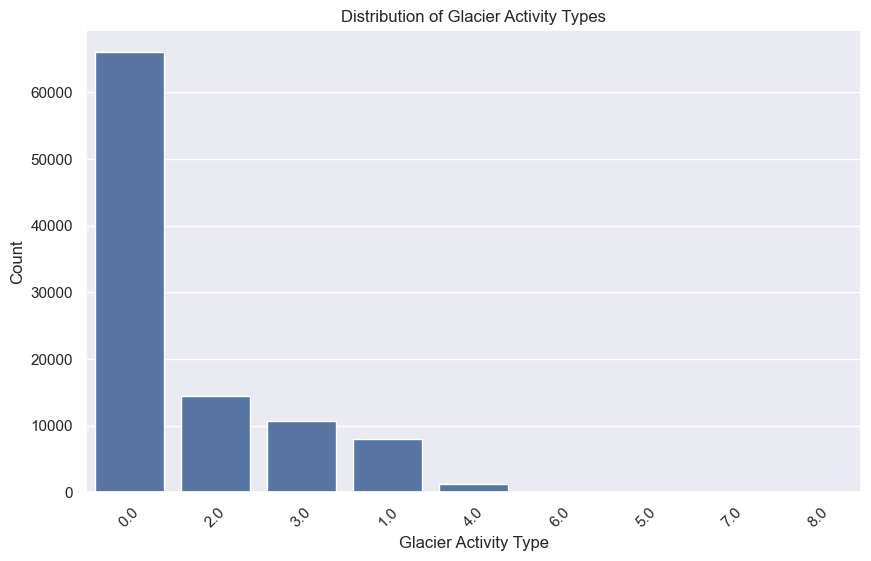

In [264]:
#Glacier Activity Assessment
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Glacier Activity', order=df['Glacier Activity'].value_counts().index)
plt.title('Distribution of Glacier Activity Types')
plt.xlabel('Glacier Activity Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Distribution of Glacier Activity Types - Most glaciers are not very active
Most glaciers have an activity level of "0.0," meaning they are inactive or stable. As activity increases, the number of glaciers in each category decreases. There are fewer glaciers classified as highly active (activity types "3.0" and above). The chart shows a clear trend where the majority of glaciers are not very active, while only a small number show significant movement or changes.

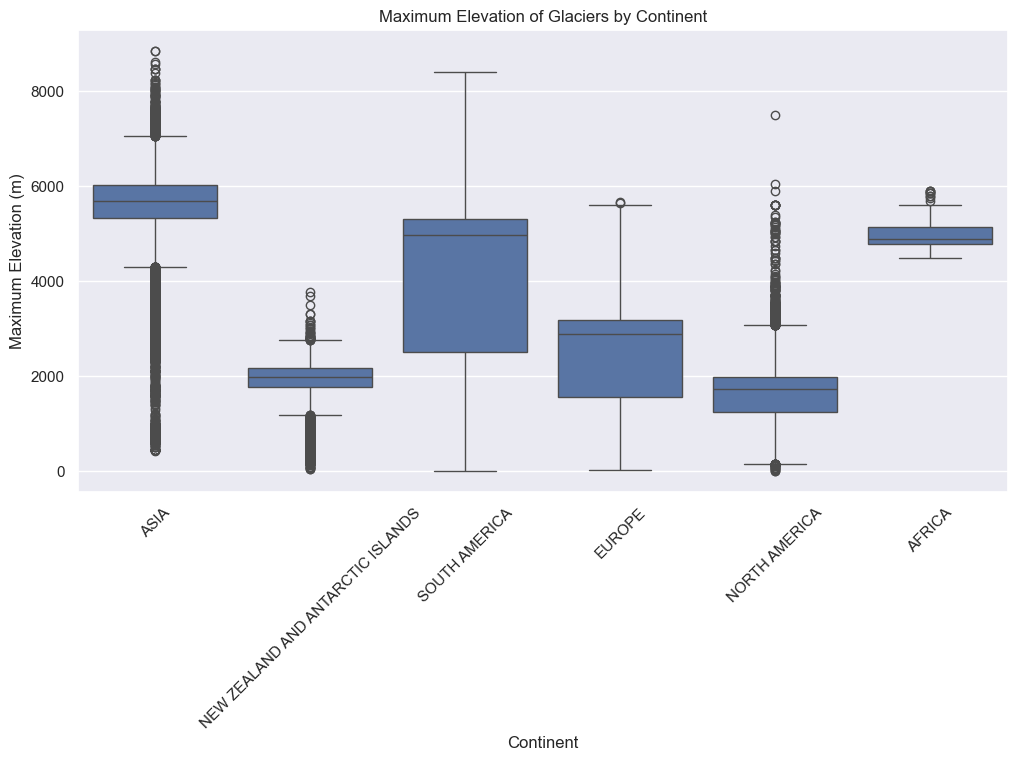

In [266]:
#Regional Analysis of Elevation Metrics

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Continent', y='Maximum Elevation')
plt.title('Maximum Elevation of Glaciers by Continent')
plt.xlabel('Continent')
plt.ylabel('Maximum Elevation (m)')
plt.xticks(rotation=45)
plt.show()

# Maximum Elevation of Glaciers by Continent - Glaciers in Asia and South America are much taller than those on other continents
What is it?: This box plot shows the maximum elevations (heights) of glaciers across different continents. The box in each continent represents where most glaciers' maximum heights fall, while dots indicate glaciers that are significantly taller than the rest.

What does it tell us?: Glaciers in South America and Asia tend to be the highest, with some reaching above 8,000 meters, likely due to the presence of the Andes and the Himalayas. Glaciers in Africa and New Zealand are generally much lower in elevation. Europe and North America have a broader range of glacier heights but tend to fall between these extremes.

Why is this important?: Glacier height plays a role in how long glaciers persist and how much they melt. Taller glaciers at high elevations in colder climates, like in South America and Asia, may last longer, while lower glaciers in warmer regions may melt faster. This impacts global sea levels and local ecosystems.

In [56]:
#Top 10 Largest Glaciers
top_glaciers = df.nlargest(10, 'Glacier Area')
print("Top 10 Largest Glaciers:")
print(top_glaciers[['Glacier ID', 'Glacier Name', 'Glacier Area']])

Top 10 Largest Glaciers:
          Glacier ID Glacier Name  Glacier Area
63518   GL2U1GC06002          NaN       8395.10
63490   GL2U1FC19001          NaN       3967.23
65051   GL2U1IB12001          NaN       2796.39
100225  US2N00700002      HUBBARD       2466.10
63697   GL2U1GH18001          NaN       2268.53
62037   GL2U1CH02001          NaN       2047.81
63695   GL2U1GH17001          NaN       1594.45
63376   GL2U1EF15002          NaN       1565.67
61287   GL2U1BF03002          NaN       1556.80
62067   GL2U1CH23003          NaN       1551.52


In [224]:
#Top 10 Largest Glaciers: Elevation Analysis 
elevation_data = top_glaciers[['Glacier ID', 'Glacier Name', 'Minimum Elevation', 'Mean Elevation', 'Maximum Elevation']]
print("Elevation Data for Top 10 Largest Glaciers:")
print(elevation_data)

Elevation Data for Top 10 Largest Glaciers:
          Glacier ID Glacier Name  Minimum Elevation  Mean Elevation  \
63518   GL2U1GC06002          NaN                0.0             NaN   
63490   GL2U1FC19001          NaN                0.0             NaN   
65051   GL2U1IB12001          NaN                0.0             NaN   
100225  US2N00700002      HUBBARD               10.0          1890.0   
63697   GL2U1GH18001          NaN                0.0             NaN   
62037   GL2U1CH02001          NaN              100.0             NaN   
63695   GL2U1GH17001          NaN                0.0             NaN   
63376   GL2U1EF15002          NaN              500.0             NaN   
61287   GL2U1BF03002          NaN                0.0             NaN   
62067   GL2U1CH23003          NaN                0.0             NaN   

        Maximum Elevation  
63518              1800.0  
63490              1800.0  
65051              1800.0  
100225             4600.0  
63697              1800

In [248]:
##Top 10 Largest Glaciers: Glacier Characteristics
glacier_types = top_glaciers[['Glacier ID', 'Glacier Name', 'Primary Class', 'Glacier Form', 'Glacier Activity']]
print("Glacier Characteristics for Top 10 Largest Glaciers:")
print(glacier_types)

Glacier Characteristics for Top 10 Largest Glaciers:
          Glacier ID Glacier Name  Primary Class  Glacier Form  \
63518   GL2U1GC06002          NaN              1           NaN   
63490   GL2U1FC19001          NaN              1           NaN   
65051   GL2U1IB12001          NaN              1           NaN   
100225  US2N00700002      HUBBARD              5           2.0   
63697   GL2U1GH18001          NaN              1           NaN   
62037   GL2U1CH02001          NaN              1           NaN   
63695   GL2U1GH17001          NaN              1           NaN   
63376   GL2U1EF15002          NaN              1           NaN   
61287   GL2U1BF03002          NaN              1           NaN   
62067   GL2U1CH23003          NaN              1           NaN   

        Glacier Activity  
63518                1.0  
63490                2.0  
65051                3.0  
100225               0.0  
63697                1.0  
62037                3.0  
63695                2.0  
6337

In [251]:
##Top 10 Largest Glaciers: Basin and Political Unit Analysis
basin_distribution = top_glaciers.groupby(['Political Unit', 'Basin Code']).size().reset_index(name='Glacier Count')
print("Basin and Political Unit Distribution for Top 10 Largest Glaciers:")
print(basin_distribution)

Basin and Political Unit Distribution for Top 10 Largest Glaciers:
  Political Unit Basin Code  Glacier Count
0      GREENLAND       U1BF              1
1      GREENLAND       U1CH              2
2      GREENLAND       U1EF              1
3      GREENLAND       U1FC              1
4      GREENLAND       U1GC              1
5      GREENLAND       U1GH              2
6      GREENLAND       U1IB              1
7  UNITED STATES       N007              1


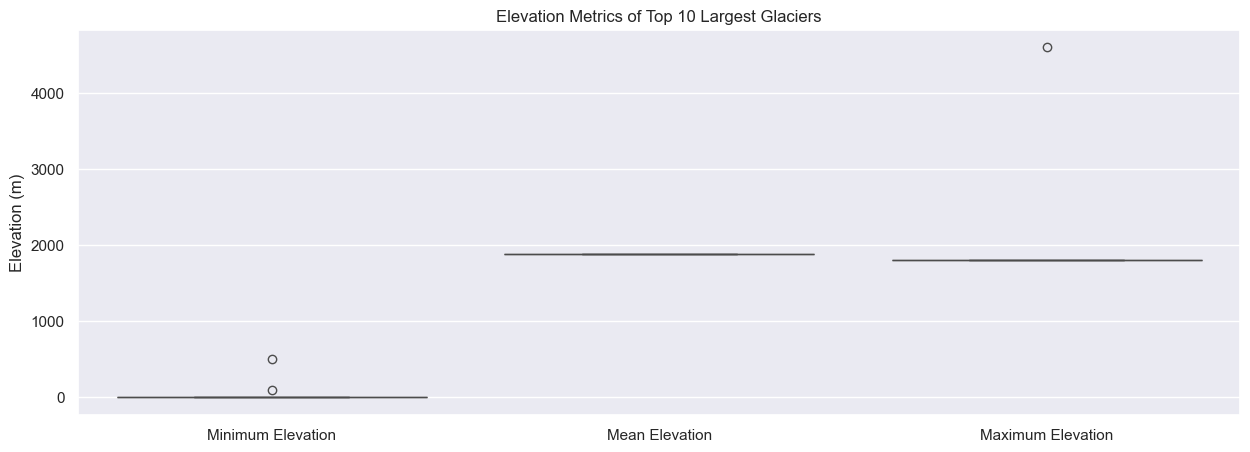

In [238]:
##Top 10 Largest Glaciers: #Elevation metrics to visualize the spread and outliers among the top 10 glaciers
plt.figure(figsize=(15, 5))
sns.boxplot(data=top_glaciers[['Minimum Elevation', 'Mean Elevation', 'Maximum Elevation']])
plt.title('Elevation Metrics of Top 10 Largest Glaciers')
plt.ylabel('Elevation (m)')
plt.xticks(ticks=[0, 1, 2], labels=['Minimum Elevation', 'Mean Elevation', 'Maximum Elevation'])
plt.show()

# Elevation Metrics of Top 10 Largest Glaciers
What is it?: This plot displays the minimum, mean, and maximum elevations of the top 10 largest glaciers. Each point represents one of the top glaciers, with the lines summarizing the general spread of elevations for the group.

What does it tell us?: The largest glaciers have a wide range of elevations. The minimum elevations are much closer to the ground, while the maximum elevations are significantly higher. The mean elevation remains steady across the glaciers, indicating that while the extremes vary greatly, the average heights don’t differ as much.

Why is this important?: Understanding elevation metrics helps to identify how glaciers interact with their surroundings and climates. Glaciers with higher maximum elevations may be in colder regions and are likely to melt slower than those closer to sea level, contributing differently to sea-level rise and regional ecosystems.

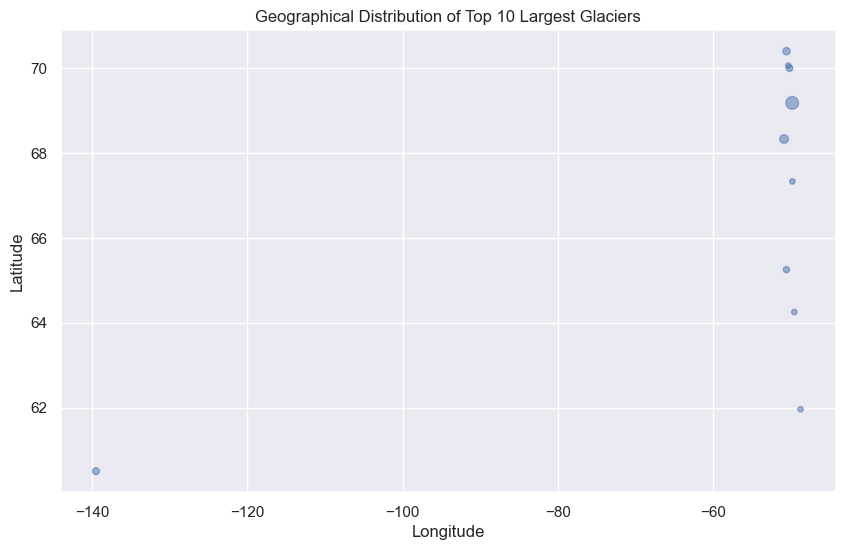

In [208]:
##Top 10 Largest Glaciers: Geographical Coordinates:
if 'Latitude' in df.columns and 'Longitude' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(top_glaciers['Longitude'], top_glaciers['Latitude'], s=top_glaciers['Glacier Area'] / 100, alpha=0.5)
    plt.title('Geographical Distribution of Top 10 Largest Glaciers')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

## Geographical Distribution of Top 10 Largest Glaciers
What is it?: This scatter plot shows the geographical distribution of the top 10 largest glaciers based on their latitude and longitude. The size of each point is proportional to the glacier's area, giving a sense of their spatial spread and relative size.

What does it tell us?: The largest glaciers are clustered around high latitudes, indicating that they are located near polar regions. Most glaciers are situated at longitudes between -140 and -60, which likely corresponds to regions like North America, Greenland, or Arctic territories. The plot reveals that these glaciers are primarily located in colder climates.

Why is this important?: Geographical distribution is crucial for studying the environmental conditions that affect glaciers. Glaciers in high-latitude regions are essential for understanding polar ice loss and its effects on global sea levels. Additionally, the glacier area provides insight into which glaciers may contribute more significantly to changes in water levels due to melting.



## The Following is Analysis to Explore the correlation between continent and other independent variables such as glacier size, elevation, and coordinates

Correlation matrix:
                   Glacier Area  Minimum Elevation  Mean Elevation  \
Glacier Area           1.000000          -0.087560       -0.052292   
Minimum Elevation     -0.087560           1.000000        0.596921   
Mean Elevation        -0.052292           0.596921        1.000000   
Maximum Elevation     -0.049767           0.949124        0.601913   
Latitude               0.043579          -0.268529        0.145907   
Longitude             -0.032548           0.593896        0.081626   

                   Maximum Elevation  Latitude  Longitude  
Glacier Area               -0.049767  0.043579  -0.032548  
Minimum Elevation           0.949124 -0.268529   0.593896  
Mean Elevation              0.601913  0.145907   0.081626  
Maximum Elevation           1.000000 -0.227743   0.621579  
Latitude                   -0.227743  1.000000  -0.238248  
Longitude                   0.621579 -0.238248   1.000000  


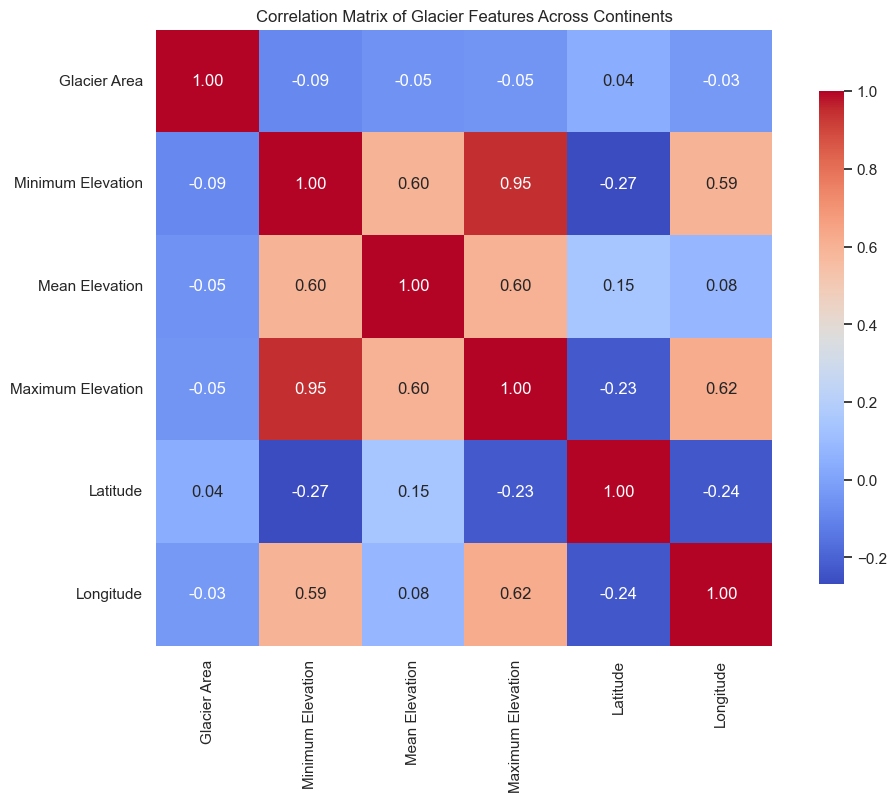

In [144]:
#Correlation Analysis: Glacier characteristics and the continent

import pandas as pd

relevant_columns = ['Continent', 'Glacier Area', 'Minimum Elevation', 
                    'Mean Elevation', 'Maximum Elevation', 'Latitude', 'Longitude']
df_filtered = df[relevant_columns]
df_encoded = pd.get_dummies(df_filtered, columns=['Continent'], drop_first=True)
numeric_df = df_encoded.select_dtypes(include=['float64', 'int64'])
numeric_df = numeric_df.fillna(numeric_df.mean())
correlation_matrix = numeric_df.corr()
print("Correlation matrix:")
print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Glacier Features Across Continents')
plt.show()

Glacier size is largely unaffected by elevation or geographic coordinates, while elevation metrics are interrelated, with higher minimum elevations resulting in higher maximum and mean elevations, latitude exhibits a negative correlation with elevations—indicating that glaciers at higher latitudes tend to be at lower elevations—whereas longitude shows a moderate correlation with elevation but minimal impact on glacier size, highlighting the importance of this analysis for understanding glacier responses to climate change in relation to geographic positioning and elevation.

## Exploratory Data Analysis (EDA) was essential for my assignment on the World Glacier Inventory dataset, which is based solely on aerial photographs.

1. Understanding Characteristics:
EDA enabled me to visualize and understand key glacier features, such as size and elevation, directly from the aerial imagery.

2. Identifying Trends:
By analyzing the data, I was able to identify trends in glacier dimensions and other characteristics that could inform discussions on climate change.

3. Informing Future Research:
The insights gained from EDA helped answer my initial questions and highlighted new areas for research related to glacier behavior and environmental impacts.

4. Guiding Decisions:
The findings from my analysis can guide decisions regarding conservation efforts and climate action, emphasizing the need for ongoing monitoring of glaciers as captured through aerial photographs.

In summary, EDA was instrumental in understanding the dynamics of glaciers as represented in the World Glacier Inventory dataset based on aerial photographs.